> By Jiahui Tang

**Spec**:
* OS: AWS VM Ubuntu 18.04 (x2.2large)
* Kernal: Linux ip-172-31-37-178 5.4.0-1039-aws #41~18.04.1-Ubuntu SMP Fri Feb 26 11:20:14 UTC 2021 x86_64 x86_64 x86_64 GNU/Linux

* Compiler: gcc version 7.5.0 (Ubuntu 7.5.0-3ubuntu1~18.04) 
* Flag: -Ofast
* Details:
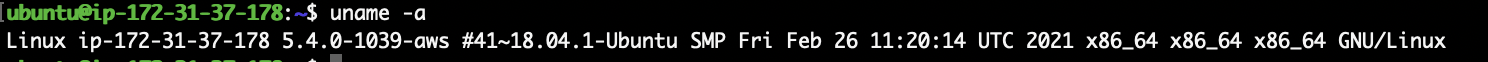
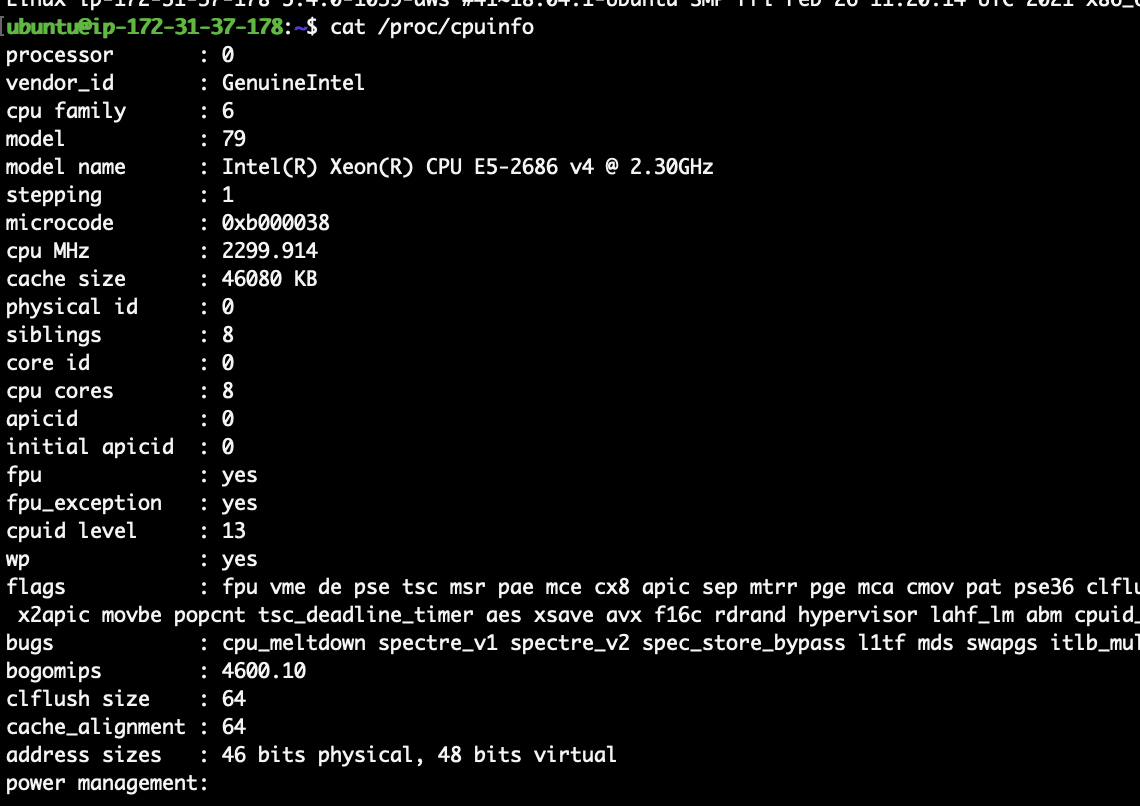
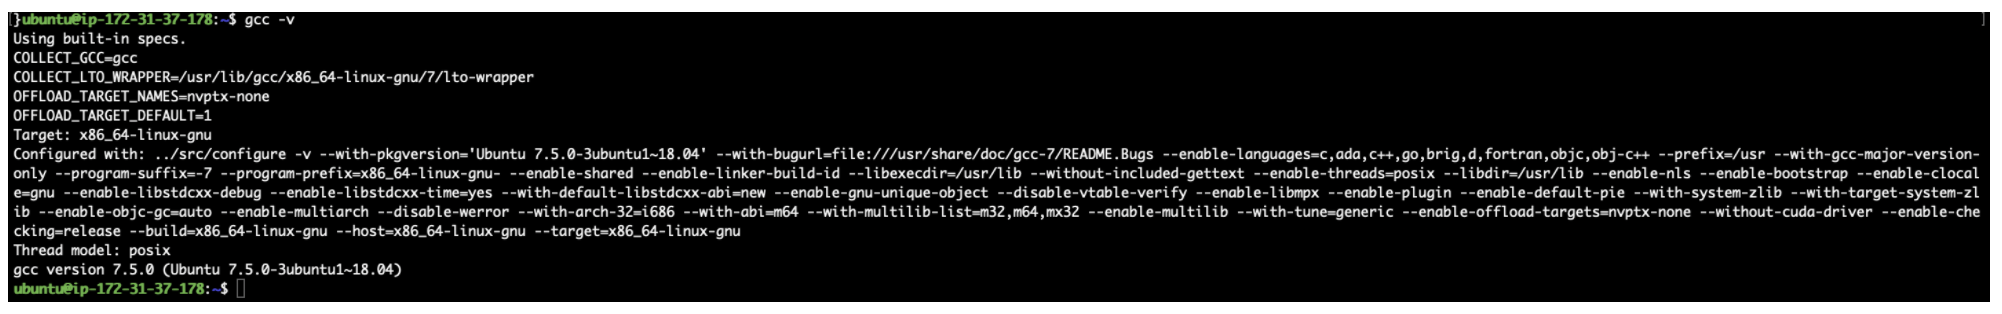
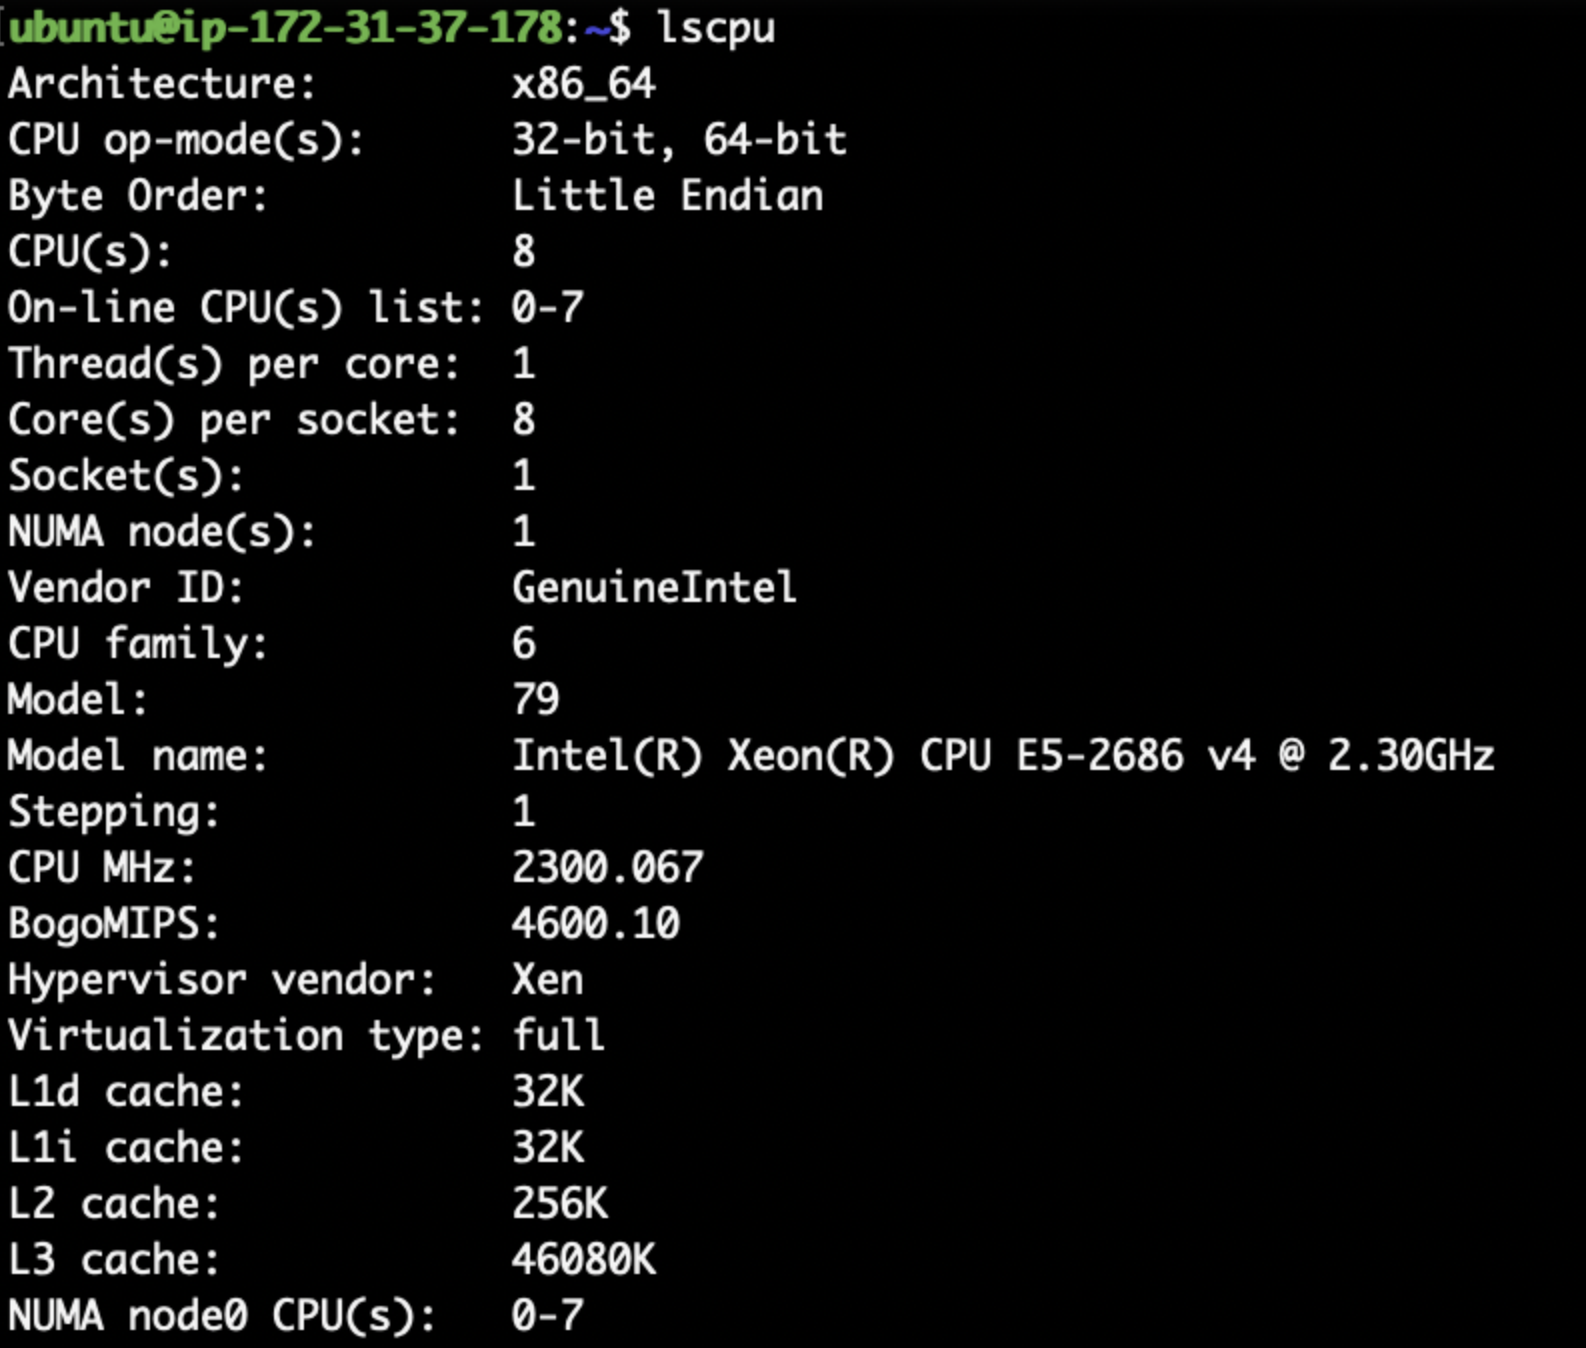


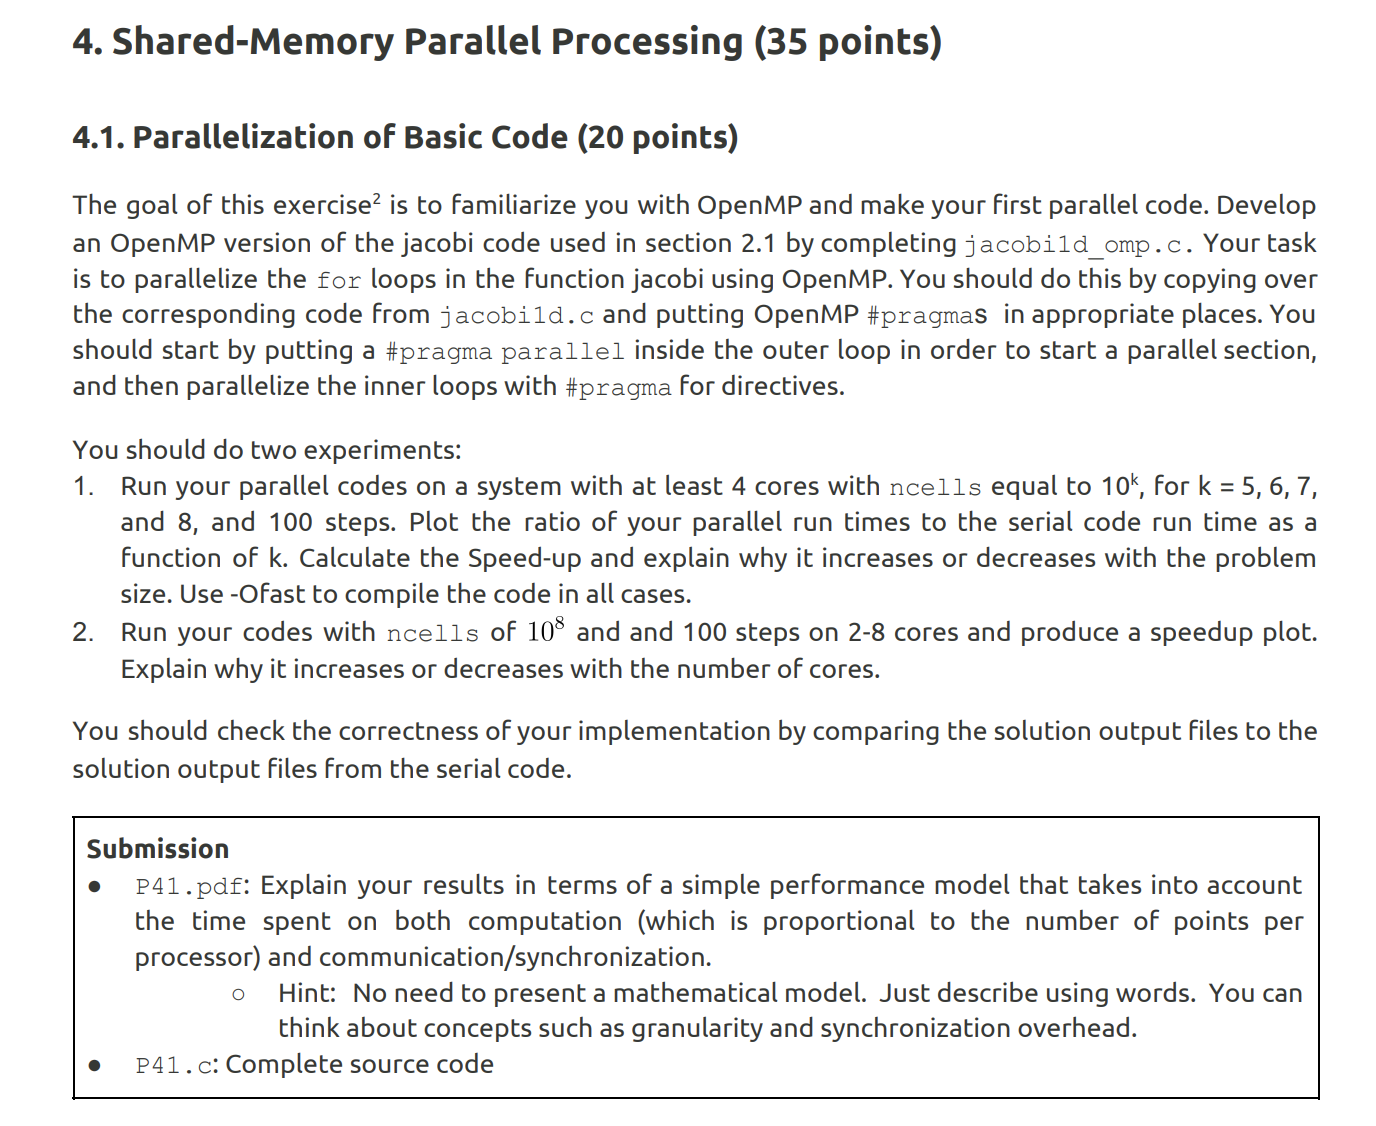

**(4.1.1)**. Table for improvements in elapsed execution time 

(*unit: seconds*)

With `ncells = 10^k`, `step=100`, `OMP_NUM_THREADS=8`,`-Ofast`

|       | k=5 Elpased Time |k=6 Elpased Time |  k=7 Elpased Time | k=8 Elpased Time |
| ----------- | ----------- |----------- |----------- |----------- |
| Parallel Code Runtime |0.007|0.037|0.731|7.224|
| Sequential Code Runtime | 0.010865        |0.104475       |2.48723        |24.8462   |
| **Ratio P/S** | 0.6442       |0.3542      |0.2939       |0.2907  |
| **Speedup S/P** | 1.5521       |2.8236      |3.4025      |3.4394  |


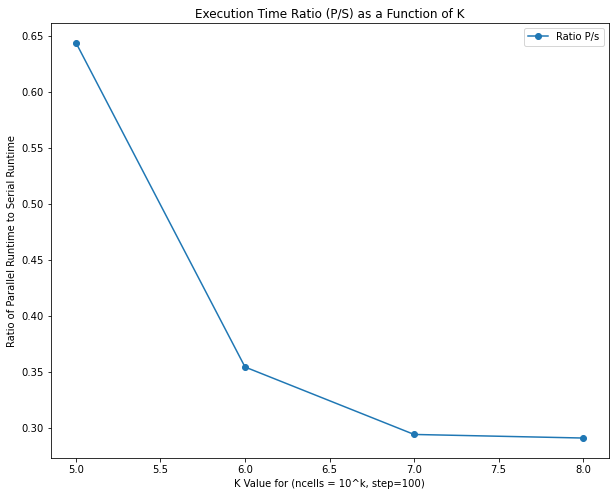

In [3]:
import matplotlib.pyplot as plt

k = [5,6,7,8]
ratio = [0.6442,0.3542,0.2939,0.2907]
#speedup = [1.5521,2.8236,3.4025,3.4394]

plt.figure(figsize = (10,8))
plt.plot(k, ratio, '-ob', label = "Ratio P/s", color="tab:blue")
#plt.plot(k, speedup, '-ob', label = "Speedup S/P",color="tab:orange")

plt.xlabel('K Value for (ncells = 10^k, step=100)')
plt.ylabel('Ratio of Parallel Runtime to Serial Runtime')
plt.title('Execution Time Ratio (P/S) as a Function of K')
plt.legend()
plt.show()

## Discussion: 

* The speed up increases with problem size, from 1.5 to 3.4 when k increases from 5 to 8.

* In order to measure times we must use real time and not cpu time, which adds the time consumed by the process in all  CPUs.

* Speedup increase with problem size because as we fixed number of thread, the overhead for synchronization and communication is roughly the same for all problem sizes. When K increases, the overheads will thus take a smaller and approaching neglible proportion of overall runtime. Total runtime adds up the parallel time and overhead time, thus it will result in a higher and higher speedup.

* It also suffer from a diminishing marginal increments because as problem size goes up, the overhead time become insignificant. The speedup thus gradually approaches real speedup. 

* Also there's diminishing marginal incremental in speedup rate when problem size goes up, as `granularity= computation/communication ratio`, when fixing number of cores, changing problem size changes the computation portion of granularity. The granularity increased to a higher ratio, became `coarse-grained`, where relatively large amounts of computational work are done between communication/synchronization events. Thus, gradually, the `load imbalance overhead` may dominates overhead, and also lead to higher execution time. It slows down the acceleration of speedup, making the marginal increase became smaller as problem size goes up.

* Finally, the speedup follows Amdahl's Law, is defined by the fraction of code (c) that can be parallelized, and bounded by sequential code, even a small percentage of sequential code can greatly limit potential speedup. Because it has overhead, thus the speedup never reaches theory speedup of 4x but were approaching limit at around 3.5.

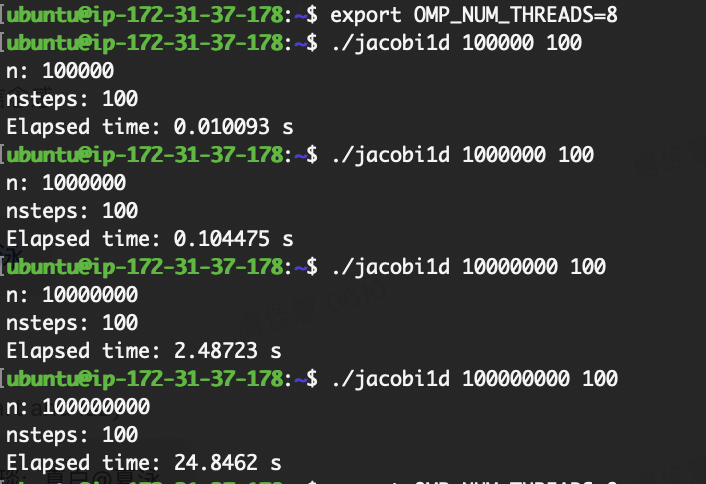
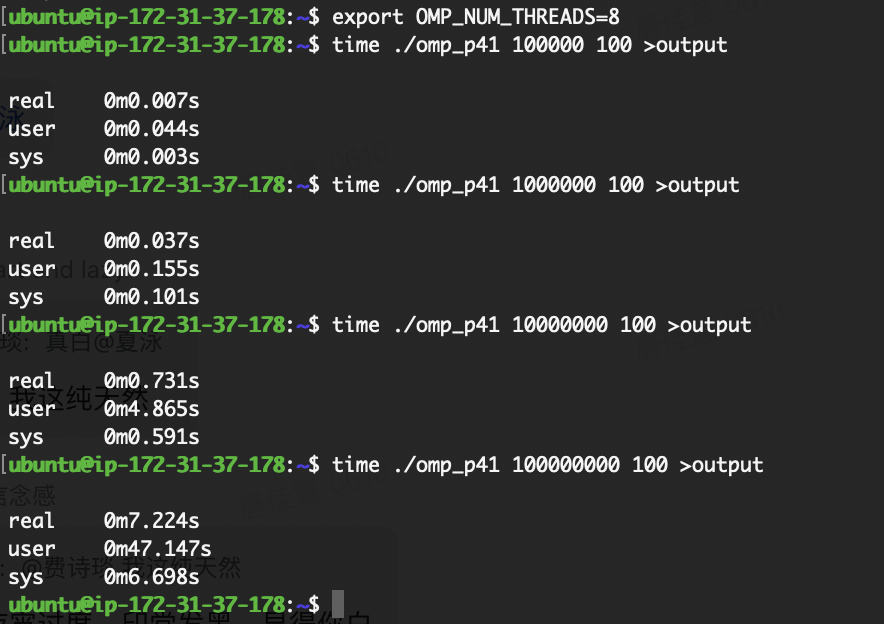

**(4.1.2)**. Table for improvements in elapsed execution time 

(*unit: seconds*)

With `ncells = 10^8`, `step=100`,`-Ofast`

| OMP_NUM_THREADS   | 2 cores |3 cores |  4 cores | 5 cores |6 cores| 7 cores|8 cores|
| ----------- | ----------- |----------- |----------- |----------- |----------- |----------- |----------- |
| Parallel Code Runtime |14.742|10.665|8.868|8.066|7.614|7.363|7.238|
| Sequential Code Runtime | 25.0803        |24.9811       |25.0209        |24.8697   |24.9831    |24.8953      |24.7347 |
| **Ratio P/S** | 0.5878       |0.4269      |0.3544      |0.3243 |0.3048     |0.2957    |0.2926|
| **Speedup S/P** | 1.7013      |2.3423      |2.8215     |3.0833  |3.2812   |3.3811     |3.4173  |

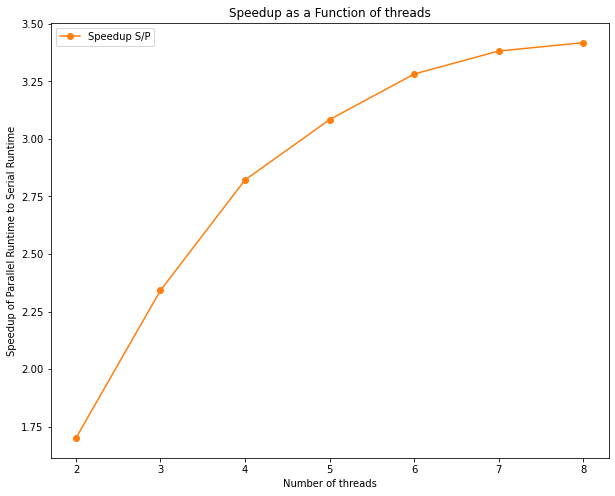

In [2]:
import matplotlib.pyplot as plt

k = [2,3,4,5,6,7,8]
ratio = [0.5878,0.4269,0.3544,0.3243,0.3048,0.2957,0.2926]
speedup = [ 1.7013,2.3423,2.8215,3.0833,3.2812,3.3811,3.4173]

plt.figure(figsize = (10,8))
#plt.plot(k, ratio, '-ob', label = "Ratio P/s", color="tab:blue")
plt.plot(k, speedup, '-ob', label = "Speedup S/P",color="tab:orange")

plt.xlabel('Number of threads')
plt.ylabel('Speedup of Parallel Runtime to Serial Runtime')
plt.title('Speedup as a Function of threads')
plt.legend()
plt.show()

## Discussion/Performance Model:

The speedup increases with number of cores in shared memory parallel processing. It makes sense because as number of cores go up, computation speedup also increases with the number of cores/threads. More cores allow more concurrency when shared same memory, that could simultaneously execute statements in the parallel region. 

But it has diminishing marginal return after `core=6` to `core=8`, it is probably due to time spent on communication/synchronization/load imbalance overhead. 

Where `granularity= computation/communication ratio`, when the core goes up, keeping problem size fixed, the granularity decreased to a lower ratio, became `fine-grained`, communicate/sync dominates the overhead time.
As the parallelized version introduces many communication overhead associated with the setup of the runtime environment and the creation of the thread. Also large number of cores requires more overhead time for synchronization, decreasing the speedup rate. Thus, it has a smaller marginal incremental of speedup rate as number of cores goes up.

Finally, the speedup follows Amdahl's Law, is defined by the fraction of code (c) that can be parallelized, and bounded by sequential code, even a small percentage of sequential code can greatly limit potential speedup. Because it has overhead, thus the speedup never reaches theory speedup.

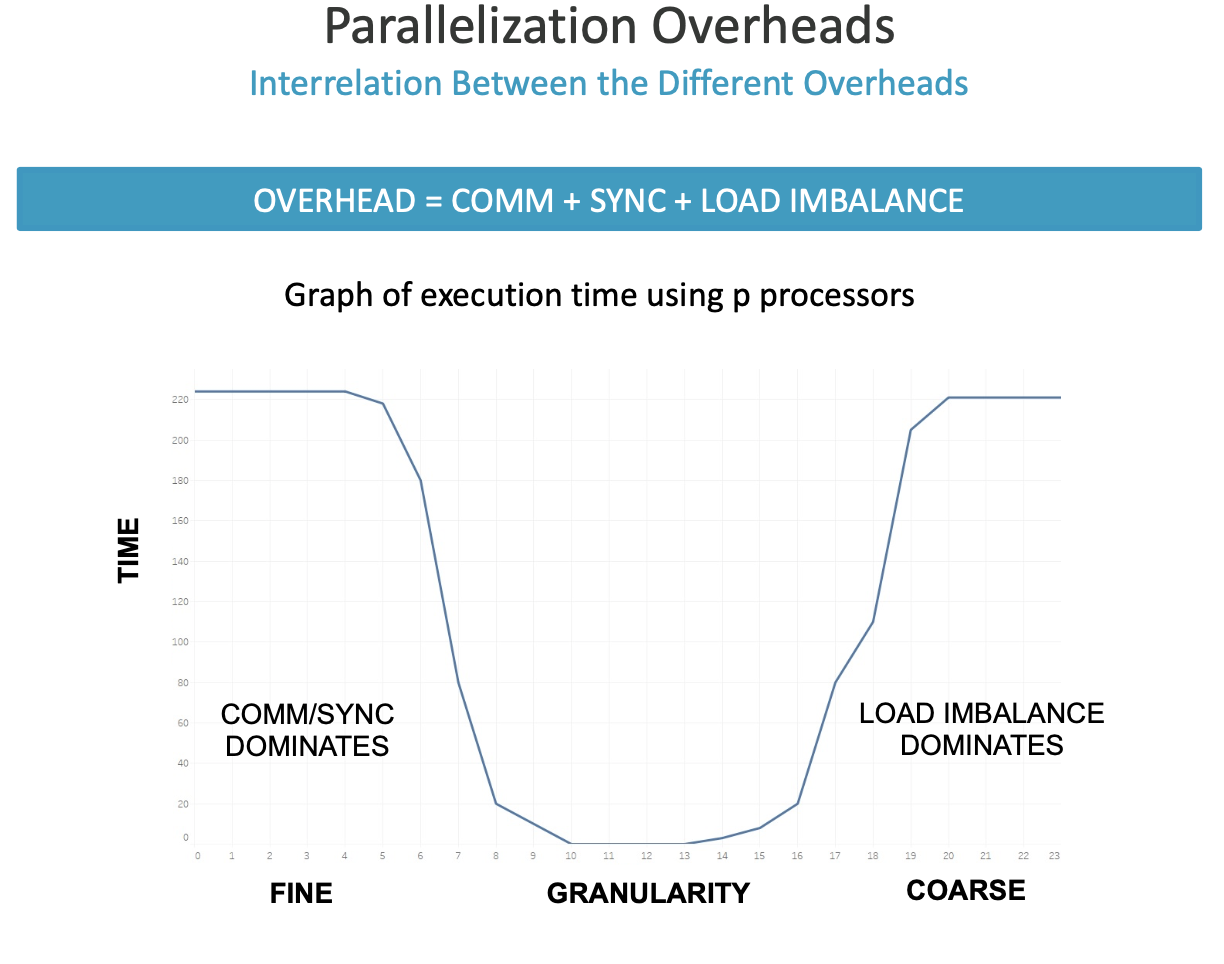
